In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install underthesea

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 60.0 MB/s eta 0:00:00


In [3]:
import tensorflow as tf
from keras.models import load_model
import pandas as pd

In [4]:
# import sys
# from io import StringIO
# import pandas as pd
# import numpy as np
# import pickle
# import regex as re
# from underthesea import word_tokenize

# input="Trời ban ánh sáng năm tháng tư bề, dáng ai về chung lối. Người mang tia nắng nhưng cớ sao còn tăm tối"
# TESTDATA = StringIO(f"""text
#     {input}
#     """)

# df = pd.read_csv(TESTDATA, sep=";")
# print(df)
# # Một số hàm tiền xử lý văn bản cần thiết
# uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
# unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"

# def loaddicchar():
#     dic = {}
#     char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
#         '|')
#     charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
#         '|')
#     for i in range(len(char1252)):
#         dic[char1252[i]] = charutf8[i]
#     return dic
# dicchar = loaddicchar()

# # Hàm chuyển Unicode dựng sẵn về Unicde tổ hợp (phổ biến hơn)
# def convert_unicode(txt):
#     return re.sub(
#         r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
#         lambda x: dicchar[x.group()], txt)

# bang_nguyen_am = [['a', 'à', 'á', 'ả', 'ã', 'ạ', 'a'],
#                   ['ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ', 'aw'],
#                   ['â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ', 'aa'],
#                   ['e', 'è', 'é', 'ẻ', 'ẽ', 'ẹ', 'e'],
#                   ['ê', 'ề', 'ế', 'ể', 'ễ', 'ệ', 'ee'],
#                   ['i', 'ì', 'í', 'ỉ', 'ĩ', 'ị', 'i'],
#                   ['o', 'ò', 'ó', 'ỏ', 'õ', 'ọ', 'o'],
#                   ['ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ', 'oo'],
#                   ['ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ', 'ow'],
#                   ['u', 'ù', 'ú', 'ủ', 'ũ', 'ụ', 'u'],
#                   ['ư', 'ừ', 'ứ', 'ử', 'ữ', 'ự', 'uw'],
#                   ['y', 'ỳ', 'ý', 'ỷ', 'ỹ', 'ỵ', 'y']]
# bang_ky_tu_dau = ['', 'f', 's', 'r', 'x', 'j']

# nguyen_am_to_ids = {}

# for i in range(len(bang_nguyen_am)):
#     for j in range(len(bang_nguyen_am[i]) - 1):
#         nguyen_am_to_ids[bang_nguyen_am[i][j]] = (i, j)

# def chuan_hoa_dau_tu_tieng_viet(word):
#     if not is_valid_vietnam_word(word):
#         return word

#     chars = list(word)
#     dau_cau = 0
#     nguyen_am_index = []
#     qu_or_gi = False
#     for index, char in enumerate(chars):
#         x, y = nguyen_am_to_ids.get(char, (-1, -1))
#         if x == -1:
#             continue
#         elif x == 9:  # check qu
#             if index != 0 and chars[index - 1] == 'q':
#                 chars[index] = 'u'
#                 qu_or_gi = True
#         elif x == 5:  # check gi
#             if index != 0 and chars[index - 1] == 'g':
#                 chars[index] = 'i'
#                 qu_or_gi = True
#         if y != 0:
#             dau_cau = y
#             chars[index] = bang_nguyen_am[x][0]
#         if not qu_or_gi or index != 1:
#             nguyen_am_index.append(index)
#     if len(nguyen_am_index) < 2:
#         if qu_or_gi:
#             if len(chars) == 2:
#                 x, y = nguyen_am_to_ids.get(chars[1])
#                 chars[1] = bang_nguyen_am[x][dau_cau]
#             else:
#                 x, y = nguyen_am_to_ids.get(chars[2], (-1, -1))
#                 if x != -1:
#                     chars[2] = bang_nguyen_am[x][dau_cau]
#                 else:
#                     chars[1] = bang_nguyen_am[5][dau_cau] if chars[1] == 'i' else bang_nguyen_am[9][dau_cau]
#             return ''.join(chars)
#         return word

#     for index in nguyen_am_index:
#         x, y = nguyen_am_to_ids[chars[index]]
#         if x == 4 or x == 8:  # ê, ơ
#             chars[index] = bang_nguyen_am[x][dau_cau]
#             # for index2 in nguyen_am_index:
#             #     if index2 != index:
#             #         x, y = nguyen_am_to_ids[chars[index]]
#             #         chars[index2] = bang_nguyen_am[x][0]
#             return ''.join(chars)

#     if len(nguyen_am_index) == 2:
#         if nguyen_am_index[-1] == len(chars) - 1:
#             x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
#             chars[nguyen_am_index[0]] = bang_nguyen_am[x][dau_cau]
#             # x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
#             # chars[nguyen_am_index[1]] = bang_nguyen_am[x][0]
#         else:
#             # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
#             # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
#             x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
#             chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
#     else:
#         # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
#         # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
#         x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
#         chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
#         # x, y = nguyen_am_to_ids[chars[nguyen_am_index[2]]]
#         # chars[nguyen_am_index[2]] = bang_nguyen_am[x][0]
#     return ''.join(chars)

# def is_valid_vietnam_word(word):
#     chars = list(word)
#     nguyen_am_index = -1
#     for index, char in enumerate(chars):
#         x, y = nguyen_am_to_ids.get(char, (-1, -1))
#         if x != -1:
#             if nguyen_am_index == -1:
#                 nguyen_am_index = index
#             else:
#                 if index - nguyen_am_index != 1:
#                     return False
#                 nguyen_am_index = index
#     return True

# def chuan_hoa_dau_cau_tieng_viet(sentence):
#     """
#         Chuyển câu tiếng việt về chuẩn gõ dấu kiểu cũ.
#         :param sentence:
#         :return:
#         """
#     sentence = sentence.lower()
#     words = sentence.split()
#     for index, word in enumerate(words):
#         cw = re.sub(r'(^\p{P}*)([p{L}.]*\p{L}+)(\p{P}*$)', r'\1/\2/\3', word).split('/')
#         # print(cw)
#         if len(cw) == 3:
#             cw[1] = chuan_hoa_dau_tu_tieng_viet(cw[1])
#         words[index] = ''.join(cw)
#     return ' '.join(words)

# stopword = set()
# file = r'/content/drive/MyDrive/NLP/vietnamese-stopwords.txt'
# for line in open(file, "r",encoding="utf8"):
#   line = line.strip('\n')
#   stopword.add(line)

# def remove_stopwords(line):
#     words = []
#     for word in line.strip().split():
#         if word not in stopword:
#             words.append(word)
#     return ' '.join(words)

# def text_preprocess(document):
#     # chuẩn hóa unicode
#     document = convert_unicode(document)
#     # chuẩn hóa cách gõ dấu tiếng Việt
#     document = chuan_hoa_dau_cau_tieng_viet(document)
#     # tách từ
#     document = word_tokenize(document, format="text")
#     # xóa stopwords
#     document = remove_stopwords(document)
#     # đưa về lower
#     document = document.lower()
#     # xóa các ký tự không cần thiết
#     document = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',document)
#     # xóa khoảng trắng thừa
#     document = re.sub(r'\s+', ' ', document).strip()
#     return document

# df['text'] = df['text'].apply(lambda x : text_preprocess(x))

# X_test = df['text']

In [5]:
import pickle
with open(r'/content/drive/MyDrive/NLP/TestDS/NoConcat/X_test_concat_with_summary.pkl', 'rb') as f:
    X_test = pickle.load(f)

In [6]:
import pickle
with open(r'/content/drive/MyDrive/NLP/TestDS/NoConcat/dict_label (1).pkl', 'rb') as f:
    dict_label = pickle.load(f)

In [7]:
X_test.shape

(45113,)

In [8]:
import pickle
with open(r'/content/drive/MyDrive/NLP/TestDS/NoConcat/notconcat_y (1).pkl', 'rb') as f:
    Y_test = pickle.load(f)


In [9]:
import pickle
with open(r'/content/drive/MyDrive/NLP/TestDS/NoConcat/vocab_No_concat.pkl', 'rb') as f:
     vocab = pickle.load(f)

In [13]:
import pickle
with open(r'/content/drive/MyDrive/NLP/TestDS/Concat all/tokenize_text.pkl', 'rb') as f:
     tok = pickle.load(f)

In [11]:
# Y_test.shape

In [12]:
model_0 = tf.keras.models.load_model(r"/content/drive/MyDrive/NLP/Concat with Summary and Title/BiGRU/model-best.h5", compile=False)
model = tf.keras.models.load_model(r"/content/drive/MyDrive/NLP/Concat with Summary and Title/BiLSTM/model_bi_lstm_news.h5", compile=False)
model2=tf.keras.models.load_model(r"/content/drive/MyDrive/NLP/Concat with Summary and Title/LSTN/model_lstm_news.h5", compile=False)

In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_0.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

# max_words = len(vocab)

# tok = Tokenizer(num_words = max_words)

In [16]:
import numpy as np
unique_classes_test = np.unique(Y_test)
unique_classes_test

array([0., 1.], dtype=float32)

In [17]:
import numpy as np
unique_classes_test = np.unique(Y_test)
unique_classes_test

array([0., 1.], dtype=float32)

In [18]:
Y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
X_test

135368    liên_minh châu_âu hôm 21 1_lệnh trừng_phạt 2 q...
199424    tình_huống đệm bóng lưới đt myanmar phút 76 vă...
34606     cảng vụ hàng_không miền bắc quyết_định xử_phạt...
189972    trận thua cúp quốc_gia 2020 huấn_luyện_viên ho...
189124    bếp ăn_trường mầm_non yên huyện hoài_đức hà_nộ...
                                ...                        
36611     lao_động thông_tin nhà_máy sản_xuất soda chu_l...
58147     22 3 chánh văn_phòng tỉnh ủy bình_dương xác_nh...
203773    mục_tiêu đội_tuyển việt_nam hướng chức vô_địch...
36658     nền_tảng xuyên biên_giới netflix apple_tv hiện...
210614    sơn_la liên_đoàn lao_động lđlđ tỉnh đơn_vị tổ_...
Name: text, Length: 45113, dtype: object

In [20]:
print(X_test.shape)
print(Y_test.shape)

(45113,)
(45113, 26)


In [22]:
test_sequences = tok.texts_to_sequences(X_test)
max_len = 2000
test_sequences_matrix = pad_sequences(test_sequences,maxlen = max_len,padding='post')
score = model.evaluate(test_sequences_matrix, Y_test, verbose=1)
score2 = model2.evaluate(test_sequences_matrix, Y_test, verbose=1)
score0 = model_0.evaluate(test_sequences_matrix, Y_test, verbose=1)
print(score)


y_predict = model.predict(test_sequences_matrix)
y_predict_0 = model_0.predict(test_sequences_matrix)
y_predict2 = model2.predict(test_sequences_matrix)

InvalidArgumentError: Graph execution error:

Detected at node sequential/embedding/embedding_lookup defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-21-f1fe28b577d3>", line 4, in <cell line: 4>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2296, in evaluate

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 4108, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1917, in test_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/sequential.py", line 398, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py", line 272, in call

indices[25,55] = 52381 is not in [0, 49000)
	 [[{{node sequential/embedding/embedding_lookup}}]] [Op:__inference_test_function_8590]

In [22]:
dict_label

{'0': 'Bạn đọc',
 '1': 'Bất động sản',
 '2': 'Công nghệ',
 '3': 'Công đoàn',
 '4': 'Diễn đàn',
 '5': 'Gia đình - Hôn nhân',
 '6': 'Giáo dục',
 '7': 'Kinh doanh',
 '8': 'Lao Động & Đời sống',
 '9': 'Lao Động cuối tuần',
 '10': 'Lưu trữ',
 '11': 'Media',
 '12': 'Pháp luật',
 '13': 'Phóng sự',
 '14': 'Sức khỏe',
 '15': 'Sự kiện Bình luận',
 '16': 'Thông tin tiện ích',
 '17': 'Thế giới',
 '18': 'Thể thao',
 '19': 'Thời sự',
 '20': 'Tin hoạt động',
 '21': 'Tin tức việc làm',
 '22': 'Tấm Lòng Vàng',
 '23': 'Văn hóa - Giải trí',
 '24': 'Xe +',
 '25': 'Xã hội'}

In [23]:

import numpy as np
for i in range(0,1):
  print(f"Câu test: {list(X_test)[i]}\nGiá trị dự đoán: {dict_label[str(np.argmax(y_predict[i]))]}")

Câu test: liên_minh châu_âu hôm 21 1_lệnh trừng_phạt 2 quan_chức cao_cấp lực_lượng tình_báo quân_đội nga đồng_thời xác_định 2 đặc_vụ nga bị_cáo buộc tấn_công hóa_học eu cáo_buộc công_dân nga 2 đặc_vụ đứng đầu phó lãnh_đạo cơ_quan tình_báo quân_đội nga gru sở_hữu vận_chuyển sử_dụng chất_độc thần_kinh salisbury 3 năm_ngoái nỗ_lực ám_sát cựu_điệp_viên nga hai đặc_vụ nga bị_cáo buộc nhập_cảnh alexander petrov ruslan_boshirov tuy_nhiên lệnh trừng_phạt xác_định anatoly chepiga alexander mishkin hai 39 lãnh_đạo gru diện eu trừng_phạt xác_định đứng đầu igor_kostyukov phó giám_đốc vladimir alexseyev quyết_định góp_phần nỗ_lực eu chống phổ_biến sử_dụng vũ_khí hóa_học đe_dọa nghiêm_trọng an_ninh quốc_tế tuyên_bố_chung họp bộ_trưởng ngoại_giao eu nhấn_mạnh cao_ủy phụ_trách đối_ngoại eu federica mogherini cho_hay quốc_gia thành_viên quyết_định cơ_sở pháp_lý mạnh_mẽ bộ_trưởng ngoại_giao jeremy hunt hoan_nghênh quyết_định ngoại_giao nga bày_tỏ phản_ứng mạnh_mẽ nhấn_mạnh cáo_buộc nhắm quân_nhân nga bị

In [24]:
from sklearn.metrics import classification_report



In [25]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Chuyển đổi dự đoán từ xác suất sang nhãn dự đoán (1 hoặc 0)
y_pred_classes = np.argmax(y_predict, axis=1)
Y_test_classes = np.argmax(Y_test, axis=1)

y_pred_classes2 = np.argmax(y_predict2, axis=1)
y_pred_classes0 = np.argmax(y_predict_0, axis=1)

# Tạo confusion matrix
conf_matrix0 = confusion_matrix(Y_test_classes, y_pred_classes0)
print(classification_report(Y_test_classes, y_pred_classes0))


conf_matrix = confusion_matrix(Y_test_classes, y_pred_classes)
print(classification_report(Y_test_classes, y_pred_classes))

conf_matrix2 = confusion_matrix(Y_test_classes, y_pred_classes2)
print(classification_report(Y_test_classes, y_pred_classes2))

print("Confusion Matrix:")
print(conf_matrix)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

           0       0.59      0.48      0.53      1725
           1       0.75      0.81      0.78      1305
           2       0.67      0.51      0.58       320
           3       0.79      0.82      0.80      4072
           4       0.00      0.00      0.00        65
           5       0.72      0.71      0.71       866
           6       0.88      0.95      0.91      4040
           7       0.77      0.80      0.79      4065
           8       0.00      0.00      0.00        75
           9       0.00      0.00      0.00       130
          10       0.60      0.07      0.12        92
          11       0.65      0.65      0.65      1407
          12       0.93      0.84      0.88      4063
          13       0.00      0.00      0.00        10
          14       0.84      0.87      0.85      2470
          15       0.00      0.00      0.00        16
          16       0.00      0.00      0.00        16
          17       0.92    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


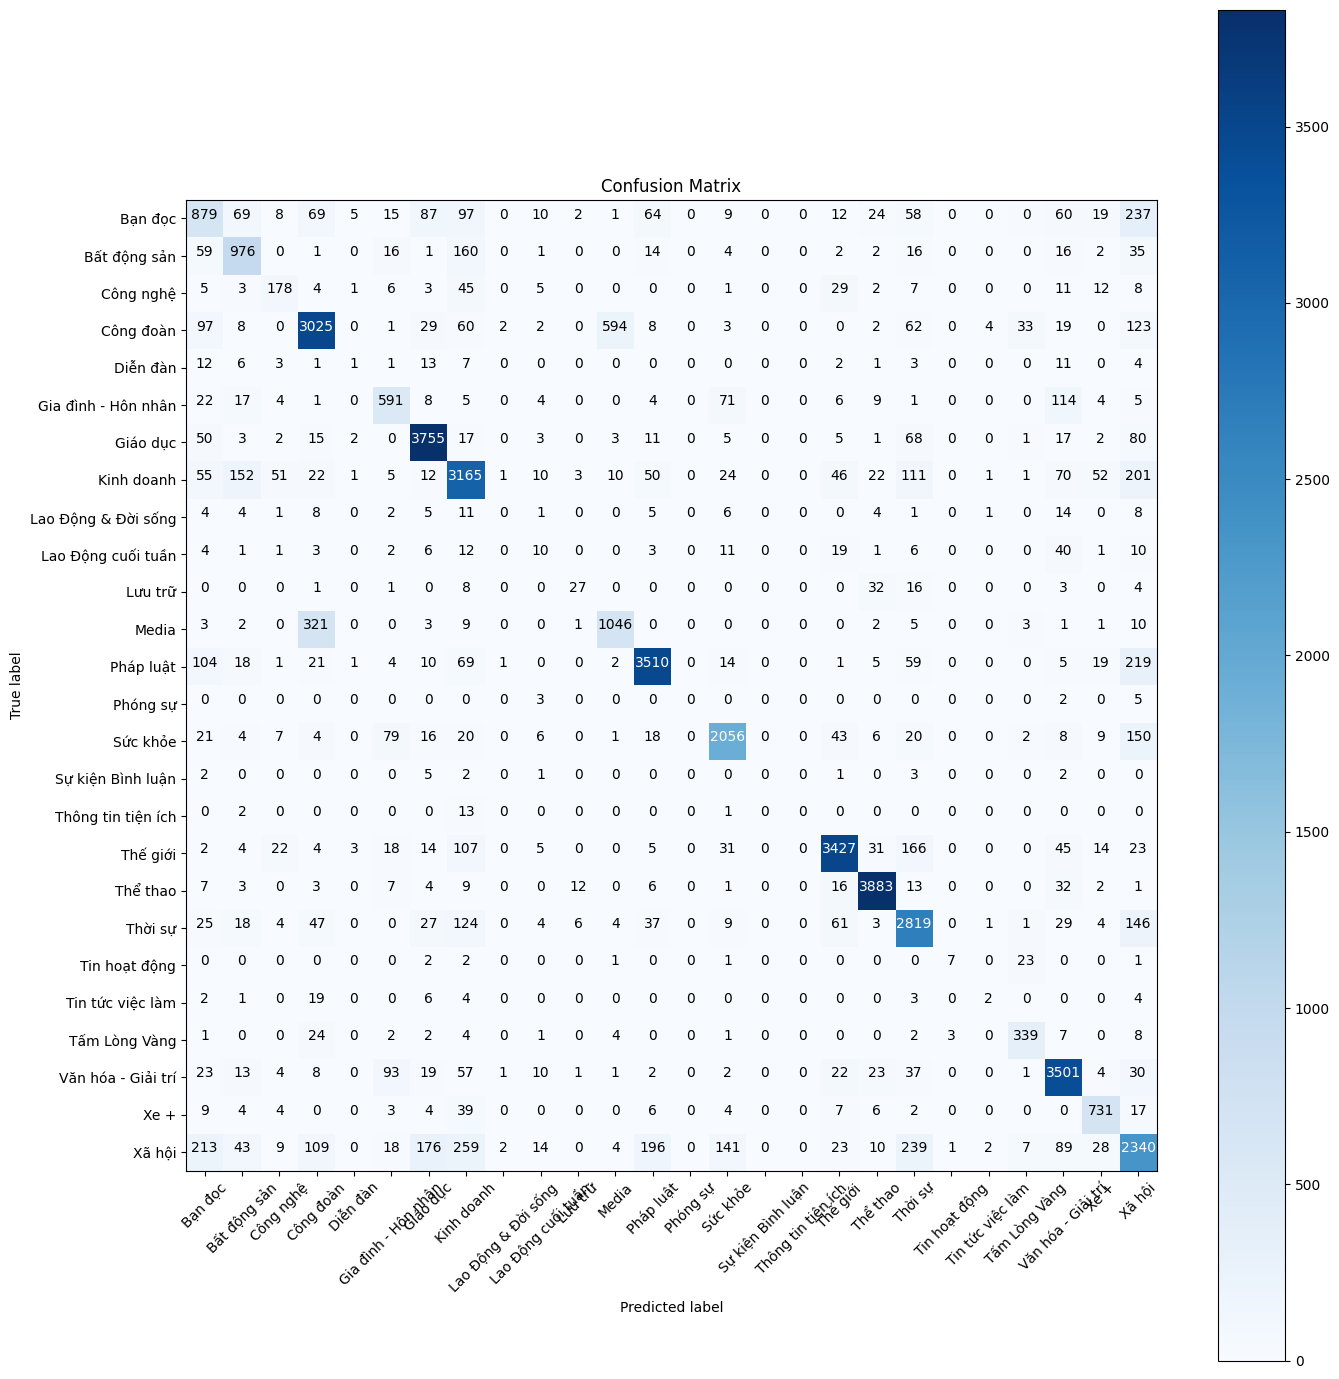

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assume conf_matrix is your confusion matrix calculated previously

# Tạo hình ảnh từ confusion matrix
plt.figure(figsize=(14, 14))
plt.imshow(conf_matrix2, cmap=plt.cm.Blues)

# Thêm tiêu đề và nhãn
plt.title('Confusion Matrix')
plt.colorbar()

# Đặt nhãn trục x và y
classes = ['Bạn đọc', 'Bất động sản', 'Công nghệ', 'Công đoàn', 'Diễn đàn', 'Gia đình - Hôn nhân', 'Giáo dục', 'Kinh doanh', 'Lao Động & Đời sống', 'Lao Động cuối tuần', 'Lưu trữ', 'Media', 'Pháp luật', 'Phóng sự', 'Sức khỏe', 'Sự kiện Bình luận', 'Thông tin tiện ích', 'Thế giới', 'Thể thao', 'Thời sự', 'Tin hoạt động', 'Tin tức việc làm', 'Tấm Lòng Vàng', 'Văn hóa - Giải trí', 'Xe +', 'Xã hội']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Hiển thị giá trị trên từng ô
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

# Định dạng và hiển thị hình ảnh
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


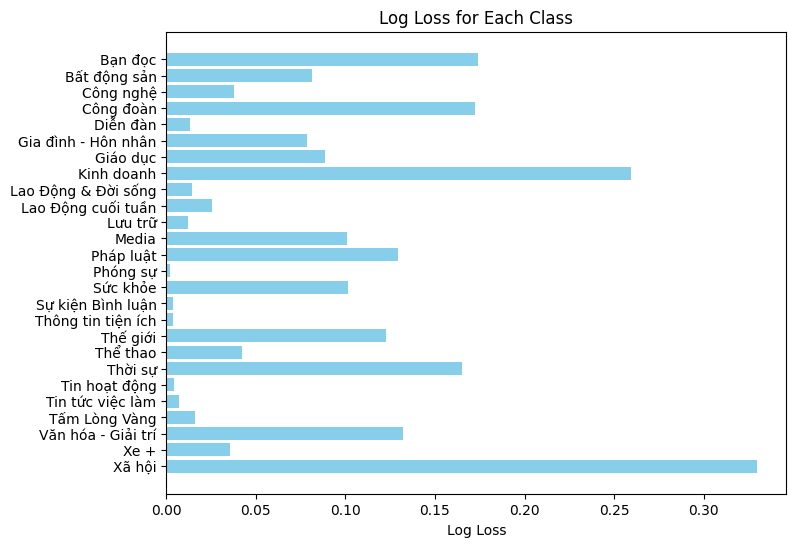

In [28]:
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt

# Y_test_classes là ground truth, còn y_predict là kết quả dự đoán của mô hình
# Xác định số lượng lớp
num_classes = len(np.unique(Y_test_classes))

# Tính toán log loss cho mỗi lớp
log_losses = []
class_names = ['Bạn đọc', 'Bất động sản', 'Công nghệ', 'Công đoàn', 'Diễn đàn', 'Gia đình - Hôn nhân', 'Giáo dục', 'Kinh doanh', 'Lao Động & Đời sống', 'Lao Động cuối tuần', 'Lưu trữ', 'Media', 'Pháp luật', 'Phóng sự', 'Sức khỏe', 'Sự kiện Bình luận', 'Thông tin tiện ích', 'Thế giới', 'Thể thao', 'Thời sự', 'Tin hoạt động', 'Tin tức việc làm', 'Tấm Lòng Vàng', 'Văn hóa - Giải trí', 'Xe +', 'Xã hội']
#class_names = ['Bạn đọc', 'Bất động sản', 'Công nghệ', 'Công đoàn', 'Diễn đàn', 'Gia đình - Hôn nhân', 'Giáo dục', 'Kinh doanh', 'Lao Động & Đời sống', 'Lao Động cuối tuần', 'Lưu trữ',  'Pháp luật', 'Phóng sự', 'Sức khỏe', 'Sự kiện Bình luận', 'Thông tin tiện ích', 'Thế giới', 'Thể thao', 'Thời sự', 'Tin hoạt động', 'Tin tức việc làm', 'Tấm Lòng Vàng', 'Văn hóa - Giải trí', 'Xe +', 'Xã hội']
for i in range(num_classes):
    log_loss_class = log_loss(Y_test_classes == i, y_predict[:, i])
    log_losses.append(log_loss_class)

# Vẽ đường cong log loss cho từng lớp
plt.figure(figsize=(8, 6))

plt.barh(class_names, log_losses, color='skyblue')
plt.xlabel('Log Loss')
plt.title('Log Loss for Each Class')
plt.gca().invert_yaxis()  # Đảo ngược trục y để lớp đầu tiên hiển thị ở trên cùng
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Chuyển đổi Y_test về dạng một nhãn cho mỗi mẫu
Y_test_single_label = np.argmax(Y_test, axis=1)

# Tiếp tục tính toán ROC curve và AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve((Y_test_single_label == i), y_predict[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tiếp tục vẽ ROC curve cho mỗi lớp
# Rest of the code remains the same
plt.figure(figsize=(13, 13))  # Điều chỉnh kích thước hình tại đây

class_names = ['Bạn đọc', 'Bất động sản', 'Công nghệ', 'Công đoàn', 'Diễn đàn', 'Gia đình - Hôn nhân', 'Giáo dục', 'Kinh doanh', 'Lao Động & Đời sống', 'Lao Động cuối tuần', 'Lưu trữ', 'Pháp luật', 'Phóng sự', 'Sức khỏe', 'Sự kiện Bình luận', 'Thông tin tiện ích', 'Thế giới', 'Thể thao', 'Thời sự', 'Tin hoạt động', 'Tin tức việc làm', 'Tấm Lòng Vàng', 'Văn hóa - Giải trí', 'Xe +', 'Xã hội']

# Sau đó, sử dụng tên lớp trong label của đường cong ROC
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='ROC({}) (AUC = {:.2f})'.format(class_names[i], roc_auc[i]))



plt.plot([0, 1], [0, 1], 'k--', label='')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt

# Y_test_classes là ground truth, còn y_predict là kết quả dự đoán của mô hình
# Xác định số lượng lớp
num_classes = len(np.unique(Y_test_classes))

# Tính toán log loss cho mỗi lớp
log_losses = []
class_names = ['Bạn đọc', 'Bất động sản', 'Công nghệ', 'Công đoàn', 'Diễn đàn', 'Gia đình - Hôn nhân', 'Giáo dục', 'Kinh doanh', 'Lao Động & Đời sống', 'Lao Động cuối tuần', 'Lưu trữ', 'Pháp luật', 'Phóng sự', 'Sức khỏe', 'Sự kiện Bình luận', 'Thông tin tiện ích', 'Thế giới', 'Thể thao', 'Thời sự', 'Tin hoạt động', 'Tin tức việc làm', 'Tấm Lòng Vàng', 'Văn hóa - Giải trí', 'Xe +', 'Xã hội']

for i in range(num_classes):
    log_loss_class = log_loss(Y_test_classes == i, y_predict[:, i])
    log_losses.append(log_loss_class)

# Vẽ đường cong log loss cho từng lớp
plt.figure(figsize=(16, 16))

for i in range(num_classes):
    plt.plot(class_names[i], log_losses[i], marker='o', label=class_names[i])

plt.xlabel('Class')
plt.ylabel('Log Loss')
plt.title('Log Loss for Each Class')
plt.legend()
plt.xticks(rotation=90)
plt.gca().invert_yaxis()  # Đảo ngược trục y để lớp đầu tiên hiển thị ở trên cùng
plt.tight_layout()
plt.show()
